# Семинар по деревьям

Воспользуемся данными boston, с которыми работали ранее.

In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split

/home/yana/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
X_tr, X_te, y_tr, y_te = train_test_split(boston["data"], boston["target"])

In [5]:
data_train = pd.DataFrame(X_tr, columns=boston["feature_names"])
data_test = pd.DataFrame(X_te, columns=boston["feature_names"])

In [6]:
data_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.10008,0.0,2.46,0.0,0.488,6.563,95.6,2.8470,3.0,193.0,17.8,396.90,5.68
1,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
2,6.28807,0.0,18.10,0.0,0.740,6.341,96.4,2.0720,24.0,666.0,20.2,318.01,17.79
3,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28
4,8.05579,0.0,18.10,0.0,0.584,5.427,95.4,2.4298,24.0,666.0,20.2,352.58,18.14


In [7]:
data_train.shape

(379, 13)

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

Далее мы будем реализовывать первый шаг в построении решающего дерева - выбор признака и порога для разделения в корне дерева. Мы будем писать максимально понятный, но не оптимальный, код, т. е. в sklearn все реализовано более эффективно.

In [9]:
# чтобы было удобно сортировать объекты вместе с целевым вектором, допишем его в датафрейм
data_train["target"] = y_tr

In [10]:
# чтобы было удобно перебирать порог на первый признак, сортируем датафрейм по нему
data_train.sort_values("CRIM", inplace=True)
data_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
131,0.00906,90.0,2.97,0.0,0.400,7.088,20.8,7.3073,1.0,285.0,15.3,394.72,7.85,32.2
46,0.01301,35.0,1.52,0.0,0.442,7.241,49.3,7.0379,1.0,284.0,15.5,394.74,5.49,32.7
25,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81,35.4
152,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80,18.9
128,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0


In [13]:
# считаем качество - дисперсию ответов в левом и правом поддереве с весами, как в лекции
feat = 'CRIM'
Q = []
Hr = np.std(data_train['target'])
for i in range(1, len(data_train)):
    HR_left = np.std(data_train.iloc[:i]['target'])
    HR_right = np.std(data_train.iloc[i:]['target'])
    Q_curr = Hr - float(i) / len(data_train) * HR_left - (1.0 - float(i) / len(data_train)) * HR_right
    Q.append(Q_curr)

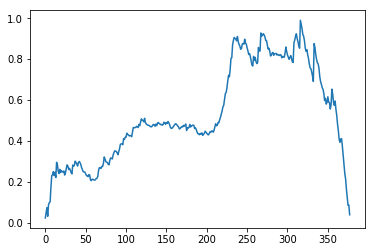

In [14]:
plt.plot(Q)

In [ ]:
# рисуем график порог - качество разделения
# your code

Где достигается оптимум?

Теперь сделаем это для каждого признака.

Обратите внимание: чтобы было удобно сравнивать значение критерия для разных признаков, мы все рисуем на одном графике. Но шкала (множество значений) у каждого признака своя. Так что мы будем откладывать по оси x просто числа от 0 до длины выборки, и величину оптимального порога по графику будет определить нельзя. По графику мы сможем определить только оптимальный признак для разделения.

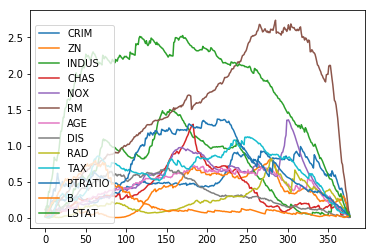

In [17]:
for feat in data_train.columns[:-1]:
    data_train.sort_values(feat, inplace=True)
    Q = []
    Hr = np.std(data_train['target'])
    for i in range(1, len(data_train)):
        HR_left = np.std(data_train.iloc[:i]['target'])
        HR_right = np.std(data_train.iloc[i:]['target'])
        Q_curr = Hr - float(i) / len(data_train) * HR_left - (1.0 - float(i) / len(data_train)) * HR_right
        Q.append(Q_curr)
    plt.plot(Q, label=feat)
plt.legend(loc=3)
plt.show()

По какому признаку выгоднее всего делить выборку? Какой порог разбиения надо выбрать?

In [19]:
feat = 'RM'
data_train.sort_values(feat, inplace=True)
Q = []
Hr = np.std(data_train['target'])
for i in range(1, len(data_train)):
    HR_left = np.std(data_train.iloc[:i]['target'])
    HR_right = np.std(data_train.iloc[i:]['target'])
    Q_curr = Hr - float(i) / len(data_train) * HR_left - (1.0 - float(i) / len(data_train)) * HR_right
    Q.append(Q_curr)

In [21]:
x = np.argmax(Q)
x

285

Нарисуйте выборку в осях RM - target и изобразите порог, по которому мы разделили выборку.

In [ ]:
# your code